In [4]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#necessary libraries to handle dataframes and numeric data 
import pandas as pd
import numpy as np

# for visuals
import pylab as plt
import seaborn as sns
%matplotlib inline

# for data splitting into train and test
from sklearn.model_selection import train_test_split as tts

#the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#the metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# to standardize
from sklearn.preprocessing import StandardScaler

#for hyperparameter tuning
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

#i will remove these later 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV 

In [5]:
data=pd.read_csv('../data/data_balanced.csv')

In [6]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [7]:
X=data.drop('fraud', axis=1)
y=data['fraud']

In [8]:
X_train, X_test, y_train, y_test =tts(X, y, 
                                       random_state=42,
                                       stratify=y)


In [9]:
escalador = StandardScaler()   
 
escalador.fit(X_train[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])
 
X_train[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']] = escalador.transform(X_train[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])   
X_test[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']] = escalador.transform(X_test[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])  


Standardising the numeric columns 'distance_from_home', 'distance_from_last_transaction' and 'ration_to_median_purchase_price' since they have different scales . Data needs to be more or less on the same scale so that the model doesn´t give preference to one column over the other due to the scale being higher. Please note I fitted the train dataset and transformed both train and test with that information. You can read more about that in the below article
https://sebastianraschka.com/faq/docs/scale-training-test.html

In [10]:
X_train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
34364,-0.407100,-0.197373,0.337115,1.0,0.0,0.0,1.0
21079,-0.309508,-0.131652,1.266614,1.0,0.0,0.0,1.0
100073,-0.353875,-0.106955,-0.472580,1.0,0.0,0.0,0.0
5769,-0.370031,-0.211139,0.479994,1.0,0.0,0.0,1.0
57842,-0.424345,-0.139255,0.617343,0.0,0.0,0.0,0.0


In [11]:
X_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
116281,-0.268551,-0.192260,0.124602,1.0,0.0,1.0,1.0
61152,-0.389862,-0.209752,1.180487,1.0,0.0,0.0,1.0
105136,-0.099497,-0.190219,-0.198441,1.0,0.0,1.0,1.0
161774,-0.364760,5.560881,-0.355935,1.0,0.0,1.0,1.0
154787,-0.428819,-0.033384,-0.630839,0.0,1.0,0.0,0.0


This is how train and test looks like now 

In [12]:
lr=LogisticRegression()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()

Initiated the models

In [13]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Trained the models

In [14]:
y_test_pred_lr = lr.predict(X_test)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_dt = dt.predict(X_test)

In [15]:
y_train_pred_lr = lr.predict(X_train)
y_train_pred_rf = rf.predict(X_train)
y_train_pred_dt = dt.predict(X_train)

Making predictions for both test and train data 

In [16]:
#Getting the metrics for each model for train and test 

def metrics(y_test, y_test_pred_model, y_train, y_train_pred_model, model):
    
    accuracy_test = accuracy_score(y_test, y_test_pred_model)
    precision_test = precision_score(y_test, y_test_pred_model)
    recall_test = recall_score(y_test, y_test_pred_model)
    f1_test = f1_score(y_test, y_test_pred_model)
    kappa_test = cohen_kappa_score(y_test, y_test_pred_model)

    accuracy_train = accuracy_score(y_train, y_train_pred_model)
    precision_train = precision_score(y_train, y_train_pred_model)
    recall_train = recall_score(y_train, y_train_pred_model)
    f1_train = f1_score(y_train, y_train_pred_model)
    kappa_train = cohen_kappa_score(y_train, y_train_pred_model)

    
    df = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                       'precision': [precision_test, precision_train],
                       'recall': [recall_test, recall_train], 
                       'f1': [f1_test, f1_train],
                       'kapppa': [kappa_test, kappa_train],
                       'set': ['test', 'train' ]})
    
    df['model'] = model
    return df


In [17]:
results_logistic = metrics(y_test, y_test_pred_lr, y_train, y_train_pred_lr, 'Logistic Regression')
# getting the metrics for logistic regression

In [18]:
results_randomforest = metrics(y_test, y_test_pred_rf, y_train, y_train_pred_rf, 'Random Forest')
# getting the metrics for random forest

In [19]:
results_decisiontree = metrics(y_test, y_test_pred_dt, y_train, y_train_pred_dt, 'Decision Tree')
# getting the metrics for decision tree

In [20]:
all_results=pd.concat([results_logistic, results_randomforest, results_decisiontree], axis=0)
#adding all the metrics in one dataframe 

In [21]:
all_results   

,accuracy,precision,recall,f1,kapppa,set,model
0,0.941788,0.935176,0.949384,0.942226,0.883575,test,Logistic Regression
1,0.940429,0.932849,0.949185,0.940946,0.880858,train,Logistic Regression
0,0.999977,1.000000,0.999954,0.999977,0.999954,test,Random Forest
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Random Forest
0,0.999954,0.999954,0.999954,0.999954,0.999908,test,Decision Tree
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree


As per the metrics above, it looks like all models are working fairly well. Logistic Regression model is working slightly worse than the rest.

Random Forest and Decision Tree models seem to be working very well for both test and train samples. The train metrics seem to be a bit better than the test metrics. This difference is not as big however so there is no fear of the models being overfitted. 

All metrics are important but in the context of this project the one that interests me the most is the recall. I want it to be as high as possible since it is the metric that takes into account the False positives

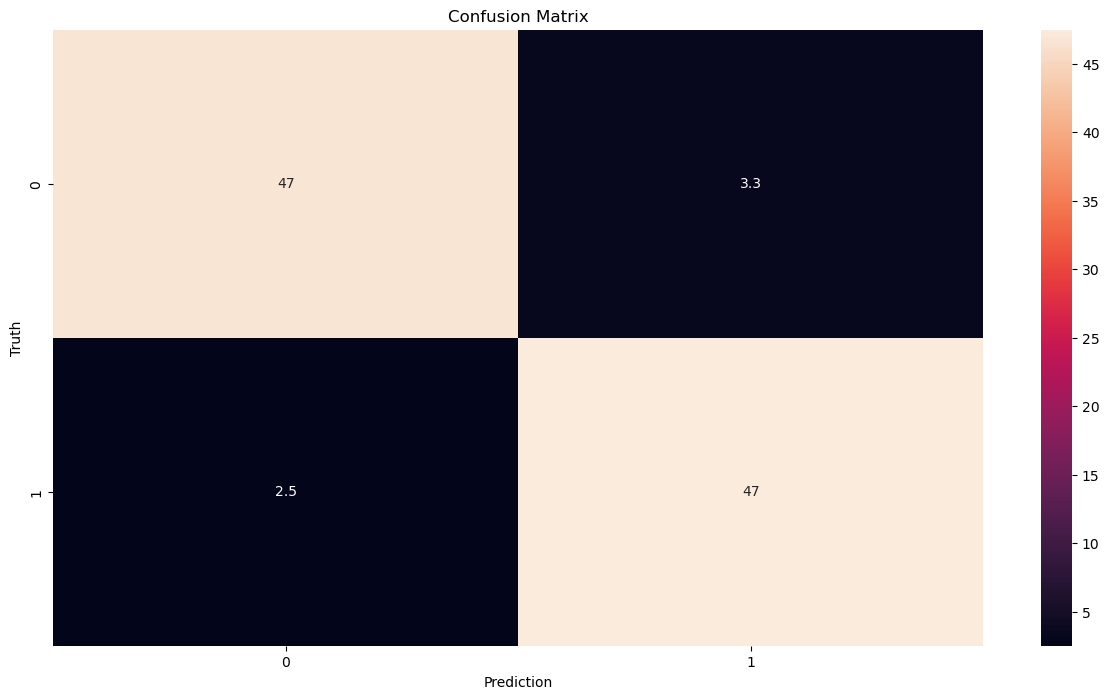

In [22]:
#confusion matrix for logistic regression
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_test_pred_lr)/cm(y_test, y_test_pred_lr).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();



From the confusion matrix above we can see that logistic regression model has 47% True Negatives (Predicted not fraud when it is actually not fraud),  47% True Positive (Predicted fraud that is actually fraud), 2.5% False Negatives (Predicted no fraud when there was fraud) and 3.3% False Positives (Predicted fraud when there was no fraud) 

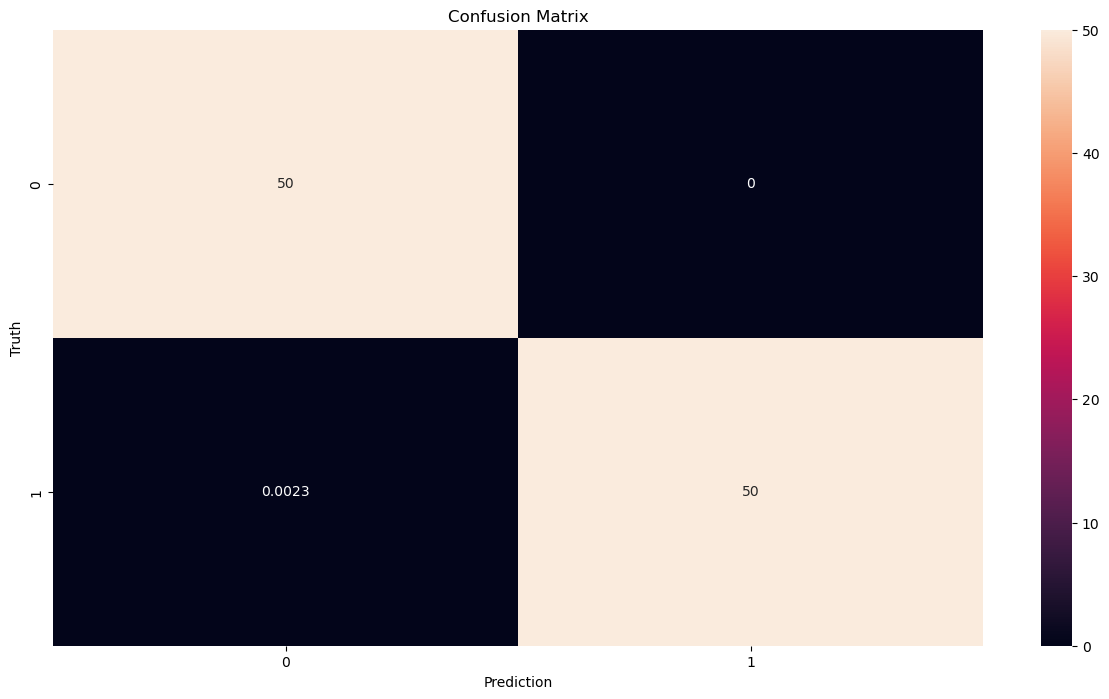

In [18]:
#confusion matrix for random forest
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_test_pred_rf)/cm(y_test, y_test_pred_rf).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();


From the confusion matrix above we can see that the random forest model has 50% True Negatives (Predicted not fraud when it is actually not fraud),  50% True Positive (Predicted fraud that is actually fraud), 0.0023% False Negatives (Predicted no fraud when there was fraud) and 0% False Positives (Predicted fraud when there was no fraud) 

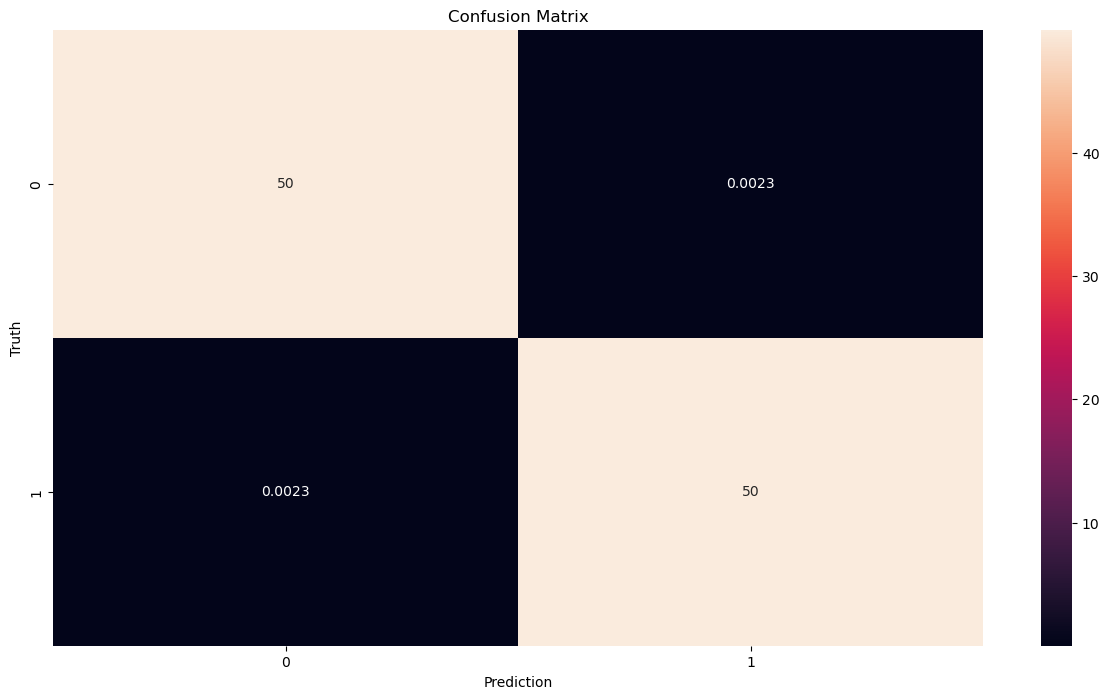

In [19]:
#confusion matrix for decision tree
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_test_pred_dt)/cm(y_test, y_test_pred_dt).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();


From the confusion matrix above we can see that logistic regression model has 50% True Negatives (Predicted not fraud when it is actually not fraud),  50% True Positive (Predicted fraud that is actually fraud), 0.0023% False Negatives (Predicted not fraud when there was fraud) and 0.0023% False Positives (Predicted fraud when there was no fraud) 

Looking at the confusion matrix figures, the models that work the best again are random forest and decision tree.
It is preferable in this case to have more False Positives (top-right) than False Negatives (bottom-left) . We prefer to classify as fraud some non-fraud transactions than let fraud cases go by without any triggers. Both random forest and decision tree have 0.0023 % False Negatives so in this case I would prefer decision tree which has 0.0023% False Negatives while random forest has 0. 

## Hyper Parameter Tuning
Iterating with different hyperparameters for each model, to find the best combination . I will use hyperopt for that. 

In [42]:

space = {
    'penalty': hp.choice('penalty', ['l1', 'l2']),
    'C': hp.loguniform('C', -5, 5),
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    'random_state': hp.choice('random_state', [None, 42]),
    'solver': hp.choice('solver', ['liblinear']),
}

def objective(space):
    model = LogisticRegression(
        penalty=space['penalty'],
        C=space['C'],
        class_weight=space['class_weight'],
        random_state=space['random_state'],
        solver=space['solver'],
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    
    return {'loss': -recall, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective,  # function to minimize
            space=space,    # dictionary of parameters
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

print("Best hyperparameters:", best)



100%|███████████████████████████████████████████████| 10/10 [00:07<00:00,  1.37trial/s, best loss: -0.9494759965218983]
Best hyperparameters: {'C': 0.781824409343105, 'class_weight': 0, 'penalty': 0, 'random_state': 1, 'solver': 0}


In [49]:
#Creating a  model for linear regression with the best parameters found by hyperopt in the above cell. 
class_weight_map = {0: None, 1: 'balanced'}
best_class_weight = class_weight_map[best['class_weight']]
penalty_map = {0: 'l1', 1: 'l2'}
best_penalty = penalty_map[best['penalty']]
solver_map = {0: 'liblinear'}
best_solver = solver_map[best['solver']]

# Create Logistic Regression model with best hyperparameters
model = LogisticRegression(
    C=best['C'],
    class_weight=best_class_weight,
    penalty=best_penalty,
    random_state=best['random_state'],
    solver=best_solver
)


In [50]:
model.fit(X_train, y_train)   #training the model

LogisticRegression(C=0.781824409343105, penalty='l1', random_state=1,
                   solver='liblinear')

In [51]:
#getting the predictions
y_pred_model_test = model.predict(X_test)
y_pred_model_train = model.predict(X_train)  

In [53]:
#calling the function metrics made above to get all the metrics for this newly created model 
results_model = metrics(y_test, y_pred_model_test, y_train, y_pred_model_train, 'Logistic Regression after tuning')
results_model

,accuracy,precision,recall,f1,kapppa,set,model
0,0.941856,0.935263,0.949430,0.942293,0.883712,test,Logistic Regression after tuning
1,0.940482,0.932882,0.949262,0.941000,0.880965,train,Logistic Regression after tuning


In [54]:
# Concatenating the initial logistic regression model and the tuned logistic regression model so we can compare them 
logistic_comparison=pd.concat([results_logistic, results_model], axis=0)

In [55]:
logistic_comparison

,accuracy,precision,recall,f1,kapppa,set,model
0,0.941788,0.935176,0.949384,0.942226,0.883575,test,Logistic Regression
1,0.940429,0.932849,0.949185,0.940946,0.880858,train,Logistic Regression
0,0.941856,0.935263,0.949430,0.942293,0.883712,test,Logistic Regression after tuning
1,0.940482,0.932882,0.949262,0.941000,0.880965,train,Logistic Regression after tuning


As we can see from the data above, there is some improvement but it is minimal

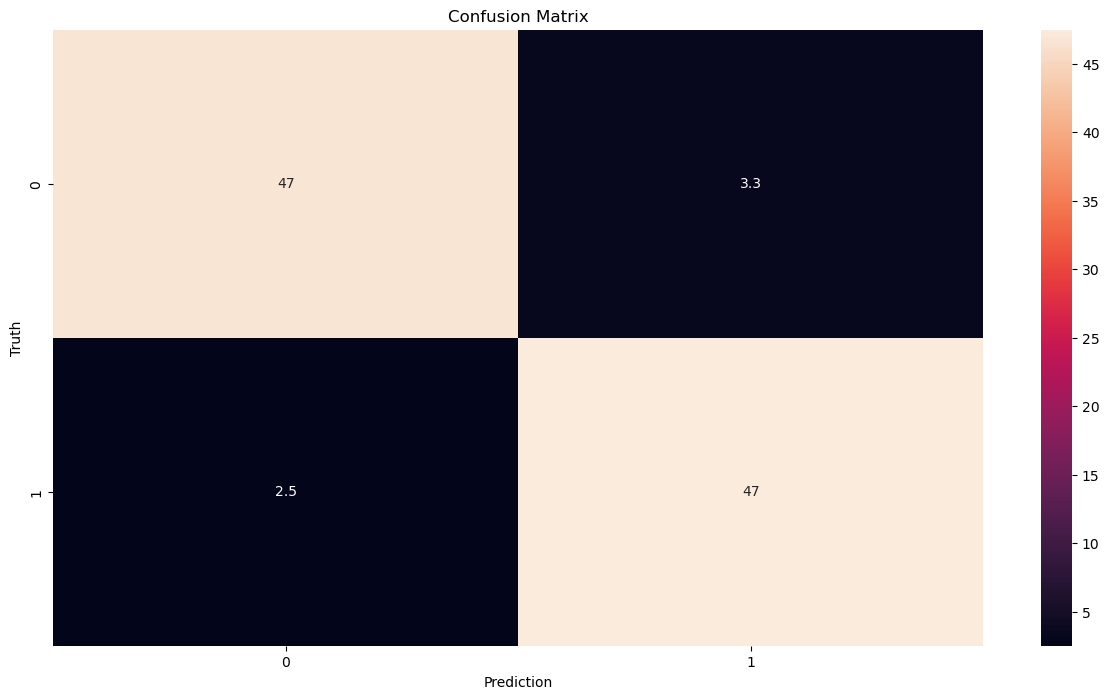

In [56]:
#confusion matrix for Tuned logistic regression
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test,  y_pred_model_test)/cm(y_test, y_pred_model_test).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();


The confusion matrix hasn´t changed at all. The difference is so mininal that it is not shown in 1 decimal